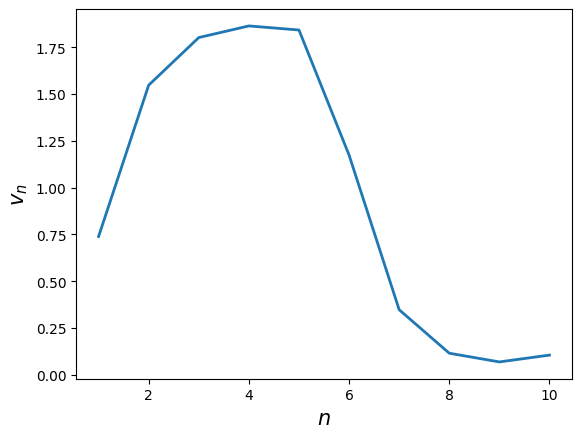

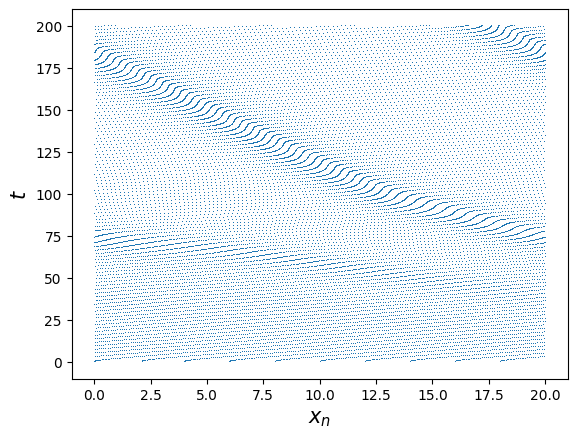

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# パラメータの設定
a = 1.0  # ドライバーの感受定数
n = 10  # 車の台数
L = 20.0  # 周長
b = L / n  # 車間距離（この逆数が密度）
T = 200.0  # シミュレーション時間
dt = 0.01  # 時間刻み幅
M = int(T / dt)  # ステップ数
inv_six = 1.0 / 6.0  # 6の逆数（4次のRunge-Kutta法で利用）


def func(x, x_b, v, v_b):
    for i in range(n - 1):
        x[i] = v_b[i]
        v[i] = a * (
            math.tanh(x_b[i + 1] - x_b[i] - 2.0) + math.tanh(2.0) - v_b[i]
        )  # 最適速度関数

    # 周期境界条件
    x[n - 1] = v_b[n - 1]
    v[n - 1] = a * (
        math.tanh(L + x_b[0] - x_b[n - 1] - 2.0) + math.tanh(2.0) - v_b[n - 1]
    )


# 配列を生成（位置と速度を格納）
x = np.empty(n)
x_b = np.empty(n)
x_temp = np.empty(n)

x_b1 = np.empty(n)
x_b2 = np.empty(n)
x_b3 = np.empty(n)
x_b4 = np.empty(n)

v = np.empty(n)
v_b = np.empty(n)
v_temp = np.empty(n)

v_b1 = np.empty(n)
v_b2 = np.empty(n)
v_b3 = np.empty(n)
v_b4 = np.empty(n)

# 初期値の設定
for i in range(n):
    x[i] = b * (i + 1)
    v[i] = 0.0

x[0] = b + 0.1  # 車1の位置を少しだけ等間隔からずらす

t = 0.0  # 時刻はt=0からスタート

# 時刻, 位置, 速度の時系列を保存するためのリスト
t_hist = []
x_hist = []
v_snapshot = []

# 車の番号を入れておくリスト
car_num = []

for m in range(M):
    for i in range(n):
        x_b[i] = x[i]
        v_b[i] = v[i]

    func(x_b1, x_b, v_b1, v_b)  # 関数funcで(x_b, v_b)からk1=(x_b1,v_b1)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b1[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b1[i] * 0.5 * dt

    func(x_b2, x_temp, v_b2, v_temp)  # 関数funcでk2=(x_b2,v_b2)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b2[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b2[i] * 0.5 * dt

    func(x_b3, x_temp, v_b3, v_temp)  # 関数funcでk3=(x_b3,v_b3)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b3[i] * dt
        v_temp[i] = v_b[i] + v_b3[i] * dt

    func(x_b4, x_temp, v_b4, v_temp)  # 関数funcでk4=(x_b4,v_b4)を計算

    for i in range(n):  # k1,k2,k3,k4を使って更新
        x[i] = (
            x_b[i] + (x_b1[i] + 2.0 * x_b2[i] + 2.0 * x_b3[i] + x_b4[i]) * dt * inv_six
        )  # inv_sixは6の逆数
        v[i] = (
            v_b[i] + (v_b1[i] + 2.0 * v_b2[i] + 2.0 * v_b3[i] + v_b4[i]) * dt * inv_six
        )

    t += dt

    if m == M / 2:
        for i in range(n):
            v_snapshot.append(v[i])
            car_num.append(i + 1)  # 車の番号を記憶

    if (m % 10) == 0:  # 10ステップ刻み（データ量を減らすため）
        for i in range(n):
            x_hist.append(x[i] % L)
            t_hist.append(t)

# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, v_snapshot, lw=2)
plt.show()

plt.xlabel("$x_n$", {"fontsize": 15})
plt.ylabel("$t$", {"fontsize": 15})
plt.plot(x_hist, t_hist, marker=",", linestyle="None")
plt.show()

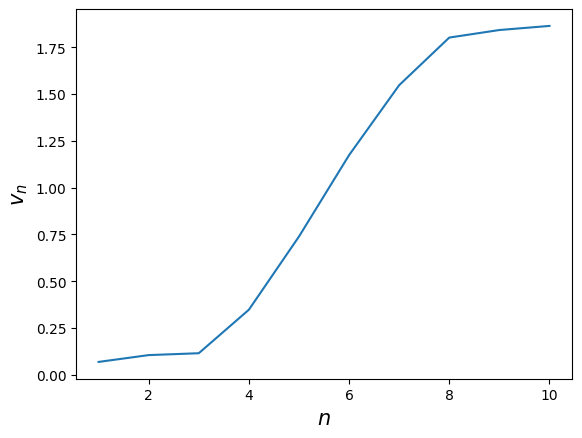

In [6]:
# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, sorted(v_snapshot))
plt.show()

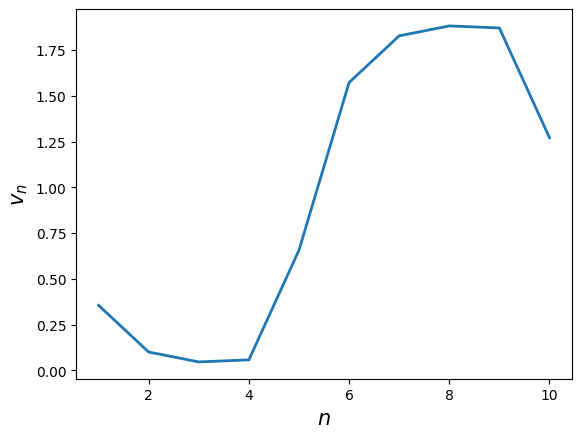

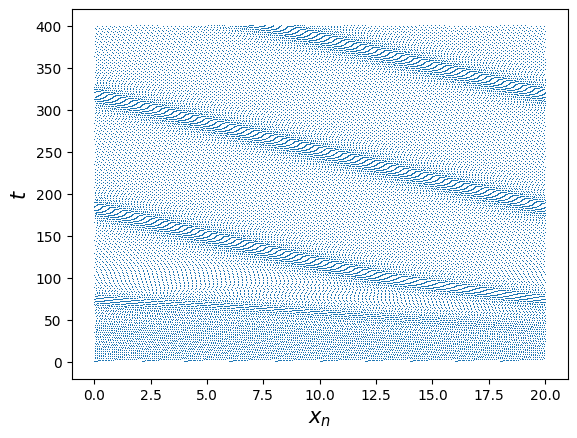

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# パラメータの設定
a = 1.0  # ドライバーの感受定数
n = 10  # 車の台数
L = 20.0  # 周長
b = L / n  # 車間距離（この逆数が密度）
T = 400.0  # シミュレーション時間
dt = 0.01  # 時間刻み幅
M = int(T / dt)  # ステップ数
inv_six = 1.0 / 6.0  # 6の逆数（4次のRunge-Kutta法で利用）


def func(x, x_b, v, v_b):
    for i in range(n - 1):
        x[i] = v_b[i]
        v[i] = a * (
            math.tanh(x_b[i + 1] - x_b[i] - 2.0) + math.tanh(2.0) - v_b[i]
        )  # 最適速度関数

    # 周期境界条件
    x[n - 1] = v_b[n - 1]
    v[n - 1] = a * (
        math.tanh(L + x_b[0] - x_b[n - 1] - 2.0) + math.tanh(2.0) - v_b[n - 1]
    )


# 配列を生成（位置と速度を格納）
x = np.empty(n)
x_b = np.empty(n)
x_temp = np.empty(n)

x_b1 = np.empty(n)
x_b2 = np.empty(n)
x_b3 = np.empty(n)
x_b4 = np.empty(n)

v = np.empty(n)
v_b = np.empty(n)
v_temp = np.empty(n)

v_b1 = np.empty(n)
v_b2 = np.empty(n)
v_b3 = np.empty(n)
v_b4 = np.empty(n)

# 初期値の設定
for i in range(n):
    x[i] = b * (i + 1)
    v[i] = 0.0

x[0] = b + 0.1  # 車1の位置を少しだけ等間隔からずらす

t = 0.0  # 時刻はt=0からスタート

# 時刻, 位置, 速度の時系列を保存するためのリスト
t_hist = []
x_hist = []
v_snapshot2 = []

# 車の番号を入れておくリスト
car_num = []

for m in range(M):
    for i in range(n):
        x_b[i] = x[i]
        v_b[i] = v[i]

    func(x_b1, x_b, v_b1, v_b)  # 関数funcで(x_b, v_b)からk1=(x_b1,v_b1)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b1[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b1[i] * 0.5 * dt

    func(x_b2, x_temp, v_b2, v_temp)  # 関数funcでk2=(x_b2,v_b2)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b2[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b2[i] * 0.5 * dt

    func(x_b3, x_temp, v_b3, v_temp)  # 関数funcでk3=(x_b3,v_b3)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b3[i] * dt
        v_temp[i] = v_b[i] + v_b3[i] * dt

    func(x_b4, x_temp, v_b4, v_temp)  # 関数funcでk4=(x_b4,v_b4)を計算

    for i in range(n):  # k1,k2,k3,k4を使って更新
        x[i] = (
            x_b[i] + (x_b1[i] + 2.0 * x_b2[i] + 2.0 * x_b3[i] + x_b4[i]) * dt * inv_six
        )  # inv_sixは6の逆数
        v[i] = (
            v_b[i] + (v_b1[i] + 2.0 * v_b2[i] + 2.0 * v_b3[i] + v_b4[i]) * dt * inv_six
        )

    t += dt

    if m == M / 2:
        for i in range(n):
            v_snapshot2.append(v[i])
            car_num.append(i + 1)  # 車の番号を記憶

    if (m % 10) == 0:  # 10ステップ刻み（データ量を減らすため）
        for i in range(n):
            x_hist.append(x[i] % L)
            t_hist.append(t)

# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, v_snapshot2, lw=2)
plt.show()

plt.xlabel("$x_n$", {"fontsize": 15})
plt.ylabel("$t$", {"fontsize": 15})
plt.plot(x_hist, t_hist, marker=",", linestyle="None")
plt.show()

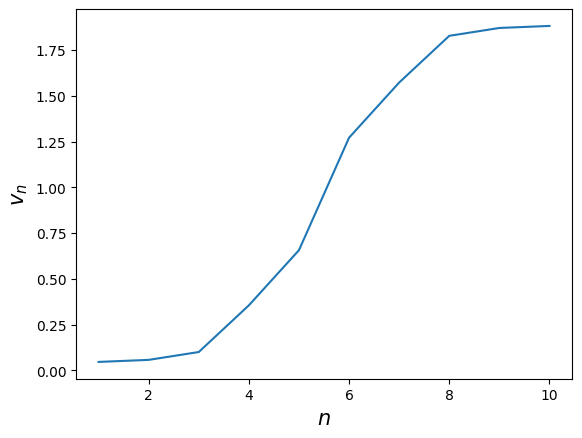

In [5]:
# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, sorted(v_snapshot2))
plt.show()

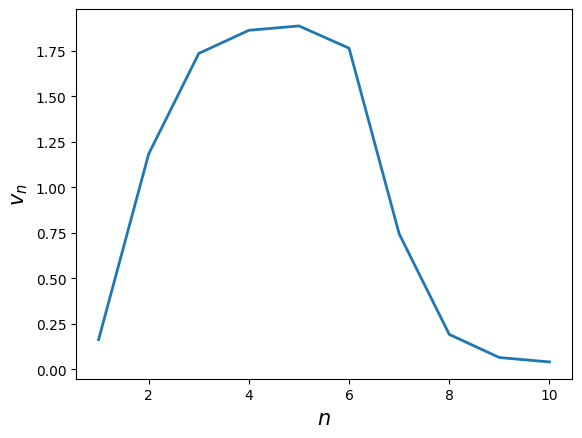

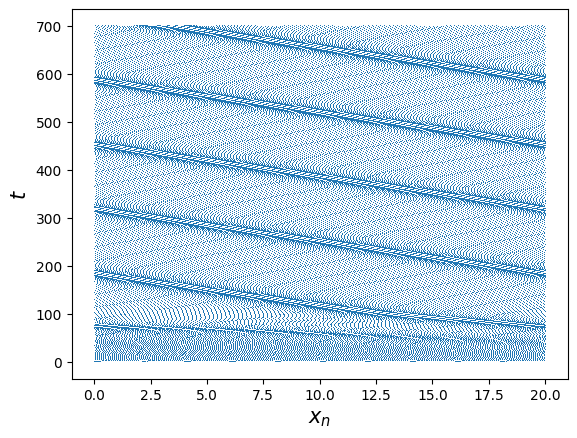

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# パラメータの設定
a = 1.0  # ドライバーの感受定数
n = 10  # 車の台数
L = 20.0  # 周長
b = L / n  # 車間距離（この逆数が密度）
T = 700.0  # シミュレーション時間
dt = 0.01  # 時間刻み幅
M = int(T / dt)  # ステップ数
inv_six = 1.0 / 6.0  # 6の逆数（4次のRunge-Kutta法で利用）


def func(x, x_b, v, v_b):
    for i in range(n - 1):
        x[i] = v_b[i]
        v[i] = a * (
            math.tanh(x_b[i + 1] - x_b[i] - 2.0) + math.tanh(2.0) - v_b[i]
        )  # 最適速度関数

    # 周期境界条件
    x[n - 1] = v_b[n - 1]
    v[n - 1] = a * (
        math.tanh(L + x_b[0] - x_b[n - 1] - 2.0) + math.tanh(2.0) - v_b[n - 1]
    )


# 配列を生成（位置と速度を格納）
x = np.empty(n)
x_b = np.empty(n)
x_temp = np.empty(n)

x_b1 = np.empty(n)
x_b2 = np.empty(n)
x_b3 = np.empty(n)
x_b4 = np.empty(n)

v = np.empty(n)
v_b = np.empty(n)
v_temp = np.empty(n)

v_b1 = np.empty(n)
v_b2 = np.empty(n)
v_b3 = np.empty(n)
v_b4 = np.empty(n)

# 初期値の設定
for i in range(n):
    x[i] = b * (i + 1)
    v[i] = 0.0

x[0] = b + 0.1  # 車1の位置を少しだけ等間隔からずらす

t = 0.0  # 時刻はt=0からスタート

# 時刻, 位置, 速度の時系列を保存するためのリスト
t_hist = []
x_hist = []
v_snapshot3 = []

# 車の番号を入れておくリスト
car_num = []

for m in range(M):
    for i in range(n):
        x_b[i] = x[i]
        v_b[i] = v[i]

    func(x_b1, x_b, v_b1, v_b)  # 関数funcで(x_b, v_b)からk1=(x_b1,v_b1)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b1[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b1[i] * 0.5 * dt

    func(x_b2, x_temp, v_b2, v_temp)  # 関数funcでk2=(x_b2,v_b2)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b2[i] * 0.5 * dt
        v_temp[i] = v_b[i] + v_b2[i] * 0.5 * dt

    func(x_b3, x_temp, v_b3, v_temp)  # 関数funcでk3=(x_b3,v_b3)を計算

    for i in range(n):
        x_temp[i] = x_b[i] + x_b3[i] * dt
        v_temp[i] = v_b[i] + v_b3[i] * dt

    func(x_b4, x_temp, v_b4, v_temp)  # 関数funcでk4=(x_b4,v_b4)を計算

    for i in range(n):  # k1,k2,k3,k4を使って更新
        x[i] = (
            x_b[i] + (x_b1[i] + 2.0 * x_b2[i] + 2.0 * x_b3[i] + x_b4[i]) * dt * inv_six
        )  # inv_sixは6の逆数
        v[i] = (
            v_b[i] + (v_b1[i] + 2.0 * v_b2[i] + 2.0 * v_b3[i] + v_b4[i]) * dt * inv_six
        )

    t += dt

    if m == M / 2:
        for i in range(n):
            v_snapshot3.append(v[i])
            car_num.append(i + 1)  # 車の番号を記憶

    if (m % 10) == 0:  # 10ステップ刻み（データ量を減らすため）
        for i in range(n):
            x_hist.append(x[i] % L)
            t_hist.append(t)

# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, v_snapshot3, lw=2)
plt.show()

plt.xlabel("$x_n$", {"fontsize": 15})
plt.ylabel("$t$", {"fontsize": 15})
plt.plot(x_hist, t_hist, marker=",", linestyle="None")
plt.show()

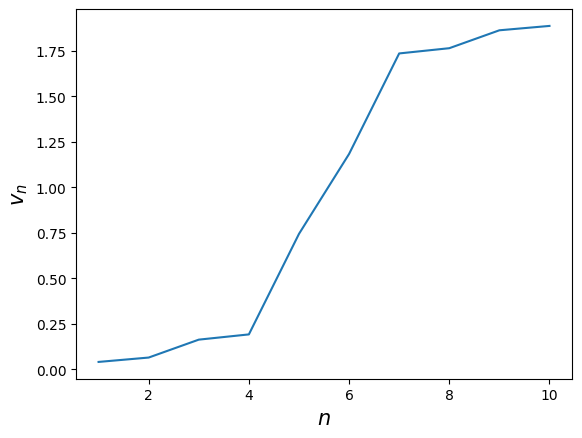

In [8]:
# グラフを描画
plt.xlabel("$n$", {"fontsize": 15})
plt.ylabel("$v_n$", {"fontsize": 15})
plt.plot(car_num, sorted(v_snapshot3))
plt.show()

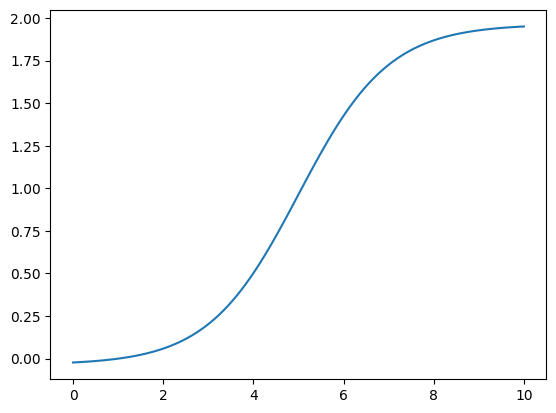

In [4]:
xx = np.linspace(0, 10, 100)
plt.plot(xx, np.tanh(2) + np.tanh((xx - 5) / 10 * 3))